# widget

In [9]:
#| code-summary: "import stuff"
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()  # datetime converter for a matplotlib
import seaborn as sns
sns.set(style="ticks", font_scale=1.5)
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from datetime import datetime as dt
import time
from statsmodels.tsa.stattools import adfuller

import plotly.io as pio
pio.renderers.default = "plotly_mimetype+notebook_connected"
import plotly.express as px


%matplotlib widget

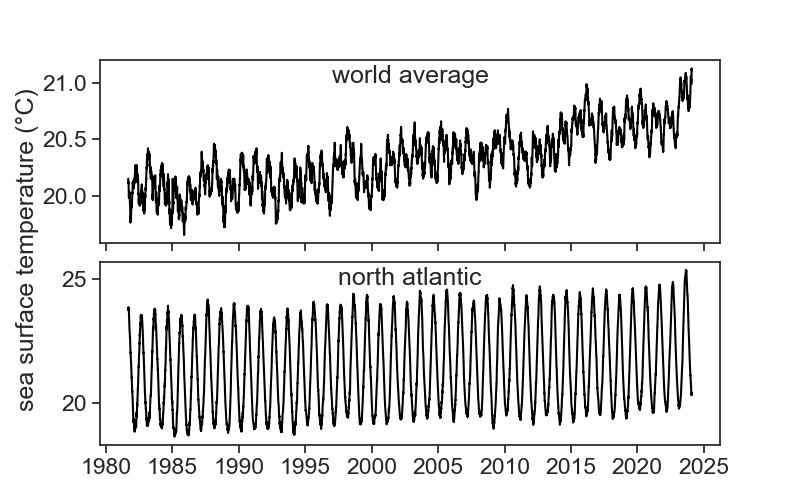

In [4]:
#| code-summary: "load and plot data"
df_north = pd.read_csv("sst_daily_north_atl.csv", index_col='date', parse_dates=True)
df_world = pd.read_csv("sst_daily_world.csv", index_col='date', parse_dates=True)

fig, ax = plt.subplots(2, 1, figsize=(8,5), sharex=True)
fig.subplots_adjust(hspace=0.1)  # increase vertical space between panels
ax[0].plot(df_world['sst'], color="black")
ax[1].plot(df_north['sst'], color="black")
fig.text(0.02, 0.5, 'sea surface temperature (°C)', va='center', rotation='vertical')
ax[1].set(yticks=[20, 25])
ax[0].text(0.5, 0.97, r"world average", transform=ax[0].transAxes,
           horizontalalignment='center', verticalalignment='top',)
ax[1].text(0.5, 0.97, r"north atlantic", transform=ax[1].transAxes,
           horizontalalignment='center', verticalalignment='top',)
pass

In [5]:
#| code-fold: false
df_north['trend'] = df_north['sst'].rolling('365D', center=True).mean()
df_world['trend'] = df_world['sst'].rolling('365D', center=True).mean()

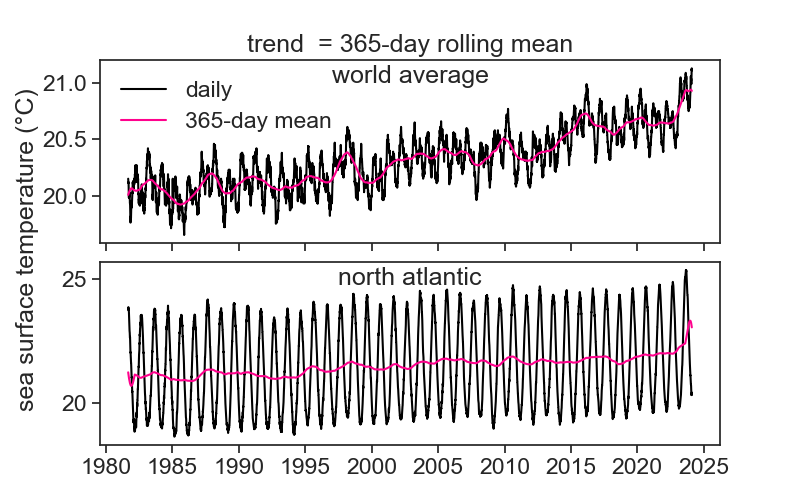

In [6]:
#| code-summary: "plot trend"
fig, ax = plt.subplots(2, 1, figsize=(8,5), sharex=True)
fig.subplots_adjust(hspace=0.1)  # increase vertical space between panels
ax[0].plot(df_world['sst'], color="black", label="daily")
ax[0].plot(df_world['trend'], color="xkcd:hot pink", label="365-day mean")
ax[1].plot(df_north['sst'], color="black")
ax[1].plot(df_north['trend'], color="xkcd:hot pink")
fig.text(0.02, 0.5, 'sea surface temperature (°C)', va='center', rotation='vertical')
ax[0].set(title="trend  = 365-day rolling mean")
ax[1].set(yticks=[20, 25])
ax[0].text(0.5, 0.97, r"world average", transform=ax[0].transAxes,
           horizontalalignment='center', verticalalignment='top',)
ax[1].text(0.5, 0.97, r"north atlantic", transform=ax[1].transAxes,
           horizontalalignment='center', verticalalignment='top',)
ax[0].legend(frameon=False)
pass

In [5]:
df_world

,sst
date,
1981-09-01,20.15
1981-09-02,20.14
1981-09-03,20.13
1981-09-04,20.13
1981-09-05,20.12
...,...
2024-02-04,21.12
2024-02-05,21.11
2024-02-06,21.13


In [10]:
df_world['sst']
fig = px.line(x=df_world.index, y=df_world['sst'], title='SST')

fig.update_xaxes(rangeslider_visible=True)
fig.show()